# HOW TO RETRIEVE AND USE VOLCANO DATA

# GNSS data

GNSS data are available through [FITS](https://fits.geonet.org.nz/api-docs/). They will shortly be migrated to [GeoNet's Tilde](https://tilde.geonet.org.nz/).

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Basic data retrieval and graphing

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [13]:
import json # package to read json code
import requests # package to get data from an API
import pandas as pd # package for data frames
import datetime as dt # package to deal with time
import matplotlib.pyplot as plt #package to do plotting

### Set the source URL

In [14]:
base_url = 'https://fits.geonet.org.nz/'
endpoint = 'observation?'

## &nbsp;2. Basic data retrieval and graphing

We need to set:
`siteID`, where data are collected, `VGMT` station on the south side of Mt Ruapehu

`typeID`, type of data collected, `u`, `n`, or `e` components of displacement (up, north and east respectively).

We can optionally set:

`days`, the last n days of data. This is counted back from today.

In [15]:
url = base_url+endpoint+'siteID=VGMT&typeID=u'
u = pd.read_csv(url, usecols=['date-time', ' u (mm)', ' error (mm)'], index_col='date-time', parse_dates=['date-time'])

#get 2024 data only
u = u['2024-01-01':]

u.rename(columns={' u (mm)':'u', ' error (mm)':'error'}, inplace=True)

u.head()

,u,error
date-time,,
2024-01-01 11:59:00+00:00,-19.74,5.77
2024-01-02 11:59:00+00:00,-11.91,5.88
2024-01-03 11:59:00+00:00,-15.36,10.72
2024-01-04 11:59:00+00:00,-19.68,6.70
2024-01-05 11:59:00+00:00,-14.90,6.57


**Repeat for `n` and `e` components**

In [16]:
url = base_url+endpoint+'siteID=VGMT&typeID=n'
n = pd.read_csv(url, usecols=['date-time', ' n (mm)', ' error (mm)'], index_col='date-time', parse_dates=['date-time'])
n = n['2024-01-01':]
n.rename(columns={' n (mm)':'n', ' error (mm)':'error'}, inplace=True)

url = base_url+endpoint+'siteID=VGMT&typeID=e'
e = pd.read_csv(url, usecols=['date-time', ' e (mm)', ' error (mm)'], index_col='date-time', parse_dates=['date-time'])
e = e['2024-01-01':]
e.rename(columns={' e (mm)':'e', ' error (mm)':'error'}, inplace=True)

### Data Summary
By using `du.describe()` we can summarise the returned data as this features generates descriptive statistics from dataframes. We can see the number of values (and errors). All the qc values are currently undefined. By default, we also get to see the mean, standard deviation, minimum, maximum, and some percentile values.

In [17]:
u.describe()

,u,error
count,342.000000,342.000000
mean,-14.402544,8.608275
std,5.331135,2.115975
min,-34.960000,5.090000
25%,-17.787500,7.442500
50%,-14.365000,8.180000
75%,-11.020000,9.297500
max,12.670000,29.280000


### Basic Data Plot of each component
By using the displacement columns from our `u`, `n`, and `e` dataframes we are able to produce a basic graph of the displacement against time. As GNSS daily solutions come with error values, we graph those as error bars.

Text(0, 0.5, 'e (mm)')

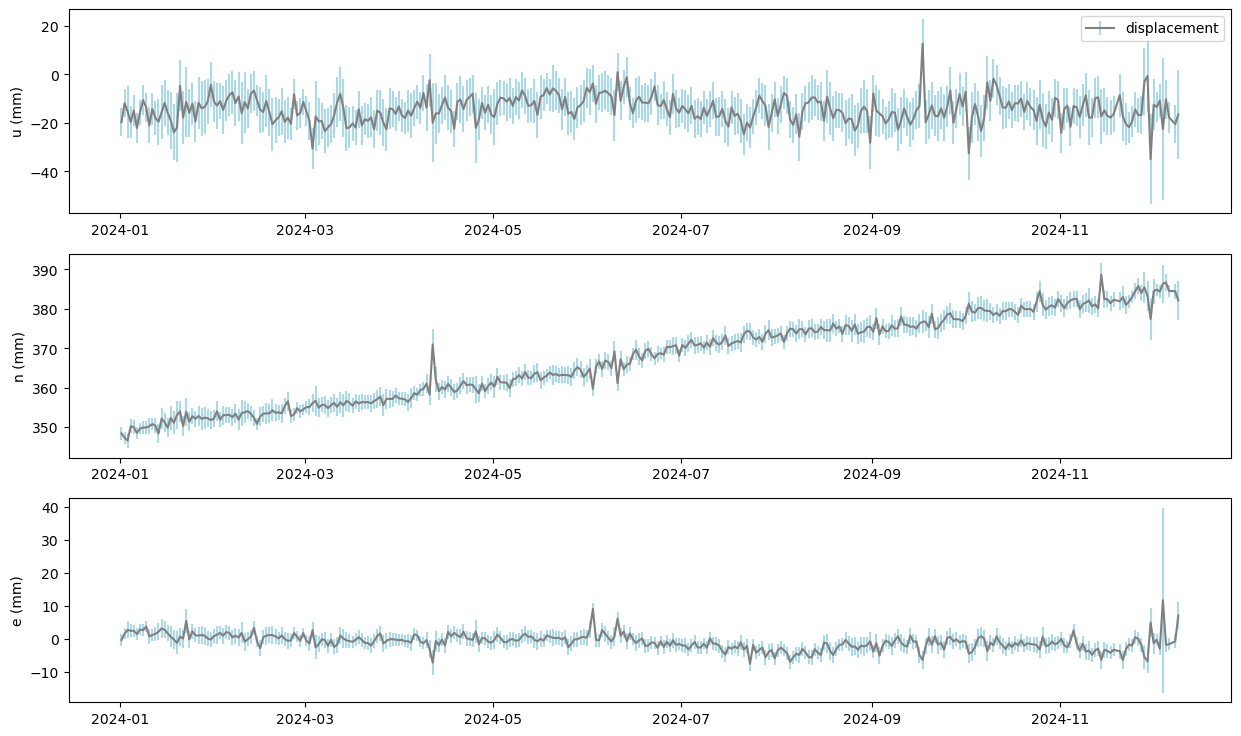

In [18]:
fig,(axu,axn,axe) = plt.subplots(3,1,figsize=(15,9))
axu.errorbar(u.index, u['u'], yerr=u['error'], color='grey', ecolor='lightblue', label='displacement')
axu.set_ylabel('u (mm)')
axu.legend()

axn.errorbar(n.index, n['n'], yerr=n['error'], color='grey', ecolor='lightblue')   
axn.set_ylabel('n (mm)')

axe.errorbar(e.index, e['e'], yerr=e['error'], color='grey', ecolor='lightblue') 
axe.set_ylabel('e (mm)')